#Session 36. Evaluation metrics and model selection

## Evaluation metrics for binary classification

In [36]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Data Science Digital Skola/healthcare-dataset-stroke-data.csv', delimiter = ",")
df.head()
#df.columns

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


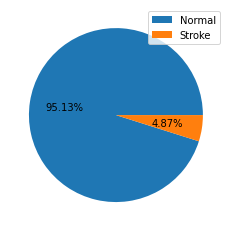

In [38]:
import matplotlib.pyplot as plt
plt.pie(df['stroke'].value_counts(), autopct='%1.2f%%')
plt.legend(['Normal', 'Stroke'])
plt.show()

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Evaluation metrics with holdout

Accuracy :  0.8988910632746249
Precision :  0.5634274674230279
Recall/ sensitivity :  0.5720377229294407
Specificity :  0.5720377229294407
Confusion matrix :
[[1360   84]
 [  71   18]]
Plot Confusion Matrix :


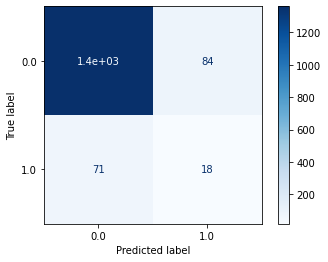

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import StandardScaler

df_X = df.drop(['id','stroke'],axis=1)
df_y = df['stroke']
#imputation
df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)
#categorical encoding
cat_features = ['gender','ever_married','work_type','Residence_type', 'smoking_status']
le = LabelEncoder()
for i in cat_features:
  df_X[i] = le.fit_transform(df_X[i])

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#scaling
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model=DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='macro')) 

sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')
print('Specificity : ',spec)

print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()


In [40]:
sensitivity_specificity_support(y_test,y_pred, average='macro')

(0.5720377229294407, 0.5720377229294407, None)

## cross validation v1

In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

df_X = df.drop(['id','stroke'],axis=1)
df_y = df['stroke']
#imputation
df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)
#categorical encoding
cat_features = ['gender','ever_married','work_type','Residence_type', 'smoking_status']
le = LabelEncoder()
for i in cat_features:
  df_X[i] = le.fit_transform(df_X[i])

X = df_X.astype(float).values
y = df_y.astype(float).values

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

dt=DecisionTreeClassifier(random_state=42)


kfold = KFold(10, shuffle=True)

scores = cross_validate(dt, X, y, cv=kfold, scoring=['accuracy','precision_macro','recall_macro'])

print('Accuracy : ',scores['test_accuracy'].mean())    
print('Precision : ',scores['test_precision_macro'].mean())  
print('Recall/ sensitivity : ',scores['test_recall_macro'].mean()) 


Accuracy :  0.9062622309197652
Precision :  0.5438114108517442
Recall/ sensitivity :  0.5599325568492051


In [48]:
scores

{'fit_time': array([0.01365948, 0.01326013, 0.01413417, 0.01310992, 0.01360059,
        0.01479864, 0.01311255, 0.01346755, 0.01439667, 0.01386762]),
 'score_time': array([0.00232434, 0.00245762, 0.00241184, 0.00230789, 0.002352  ,
        0.00239801, 0.00226951, 0.00231528, 0.00226831, 0.00228977]),
 'test_accuracy': array([0.92563601, 0.88649706, 0.92367906, 0.90019569, 0.90019569,
        0.88454012, 0.91780822, 0.91585127, 0.89236791, 0.91585127]),
 'test_precision_macro': array([0.52704964, 0.53340263, 0.5487395 , 0.53951613, 0.5581986 ,
        0.5530303 , 0.58373873, 0.54165182, 0.51869748, 0.53408928]),
 'test_recall_macro': array([0.5296334 , 0.52818713, 0.63560454, 0.54347826, 0.55307281,
        0.60271218, 0.59633745, 0.53707375, 0.52470262, 0.54852342])}

## stratified cross validation v1


In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

df_X = df.drop(['id','stroke'],axis=1)
df_y = df['stroke']
#imputation
df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)
#categorical encoding
cat_features = ['gender','ever_married','work_type','Residence_type', 'smoking_status']
le = LabelEncoder()
for i in cat_features:
  df_X[i] = le.fit_transform(df_X[i])

X = df_X.astype(float).values
y = df_y.astype(float).values
#scaling
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

dt=DecisionTreeClassifier(random_state=42)
scores = cross_validate(dt, X, y, cv=10, scoring=['accuracy','precision_macro','recall_macro'])

print('Accuracy : ',scores['test_accuracy'].mean())    
print('Precision : ',scores['test_precision_macro'].mean())  
print('Recall/ sensitivity : ',scores['test_recall_macro'].mean()) 


Accuracy :  0.9117416829745597
Precision :  0.5450436296054475
Recall/ sensitivity :  0.5554395940544696


In [57]:
scores

{'fit_time': array([0.01378989, 0.01470256, 0.01438928, 0.01419568, 0.01396465,
        0.01400518, 0.01310658, 0.01345658, 0.01397777, 0.0132134 ]),
 'score_time': array([0.00260663, 0.00262904, 0.00259686, 0.00249386, 0.00311923,
        0.00248647, 0.00250459, 0.00311613, 0.00256944, 0.00250149]),
 'test_accuracy': array([0.91976517, 0.92172211, 0.90802348, 0.90606654, 0.89236791,
        0.89823875, 0.91389432, 0.91780822, 0.90998043, 0.9295499 ]),
 'test_precision_macro': array([0.57553529, 0.50512027, 0.58729276, 0.54264113, 0.53043285,
        0.55679596, 0.56546001, 0.47469636, 0.53282828, 0.5796334 ]),
 'test_recall_macro': array([0.57839506, 0.50353909, 0.6291358 , 0.55222222, 0.54502058,
        0.58604938, 0.57530864, 0.48251029, 0.53530864, 0.56690623])}

## CV Version 2

In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support

def dt(X_train, y_train, X_test, y_test):
  model=DecisionTreeClassifier(random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc=accuracy_score(y_test, y_pred)
  prec= precision_score(y_test, y_pred, average='macro')
  rec= recall_score(y_test, y_pred, average='macro')
  sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')

  return acc, prec, rec, spec



In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import numpy as np

df_X = df.drop(['id','stroke'],axis=1)
df_y = df['stroke']
#imputation
df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)
#categorical encoding
cat_features = ['gender','ever_married','work_type','Residence_type', 'smoking_status']
le = LabelEncoder()
for i in cat_features:
  df_X[i] = le.fit_transform(df_X[i])

X = df_X.astype(float).values
y = df_y.astype(float).values

accs, precs, recs, specs = list(), list(), list(), list()
i=1
kfold = KFold(10, shuffle=True)
for train_ix, test_ix in kfold.split(X,y):
    X_train, y_train = X[train_ix], y[train_ix]
    X_test, y_test = X[test_ix], y[test_ix]
    #print(pd.DataFrame(y_test).value_counts())
    #scaling
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    acc, prec, rec, spec = dt(X_train, y_train, X_test, y_test)
    print('iteration ', i)
    print('accuracy ', acc, 'precision ', prec, 'recall ', rec, 'specificity ', spec)
    accs.append(acc)
    precs.append(prec)
    recs.append(rec)
    specs.append(spec)
    print('-----------')
    
    i = i + 1

print('------')
print('Final Accuracy: %.3f' % (np.mean(accs)))
print('Final Precision: %.3f' % (np.mean(precs)))
print('Final Specificity: %.3f' % (np.mean(specs)))
print('Final Recall: %.3f' % (np.mean(recs)))


iteration  1
accuracy  0.8943248532289628 precision  0.5529579657498702 recall  0.5839917695473251 specificity  0.5839917695473251
-----------
iteration  2
accuracy  0.9275929549902152 precision  0.5658795345653662 recall  0.5748299319727891 specificity  0.5748299319727891
-----------
iteration  3
accuracy  0.9060665362035225 precision  0.590164609053498 recall  0.5657563025210084 specificity  0.5657563025210084
-----------
iteration  4
accuracy  0.9158512720156555 precision  0.582485380116959 recall  0.6370748299319727 specificity  0.6370748299319727
-----------
iteration  5
accuracy  0.9334637964774951 precision  0.5962539505484291 recall  0.5962539505484291 specificity  0.5962539505484291
-----------
iteration  6
accuracy  0.9099804305283757 precision  0.49736625514403293 recall  0.49714896650035634 specificity  0.49714896650035634
-----------
iteration  7
accuracy  0.9021526418786693 precision  0.5515168331483536 recall  0.5662569389373513 specificity  0.5662569389373513
----------

## stratified CV ver 2

In [66]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support

def dt(X_train, y_train, X_test, y_test):
  model=DecisionTreeClassifier(random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc=accuracy_score(y_test, y_pred)
  prec= precision_score(y_test, y_pred, average='macro')
  rec= recall_score(y_test, y_pred, average='macro')
  sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')

  return acc, prec, rec, spec

In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import numpy as np

df_X = df.drop(['id','stroke'],axis=1)
df_y = df['stroke']
#imputation
df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)
#categorical encoding
cat_features = ['gender','ever_married','work_type','Residence_type', 'smoking_status']
le = LabelEncoder()
for i in cat_features:
  df_X[i] = le.fit_transform(df_X[i])
  
X = df_X.astype(float).values
y = df_y.astype(float).values

accs, precs, recs, specs = list(), list(), list(), list()
i=1
kfold = StratifiedKFold(10, shuffle=True)
for train_ix, test_ix in kfold.split(X,y):
    X_train, y_train = X[train_ix], y[train_ix]
    X_test, y_test = X[test_ix], y[test_ix]
    #print(pd.DataFrame(y_test).value_counts())
    #scaling
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    acc, prec, rec, spec = dt(X_train, y_train, X_test, y_test)
    print('iteration ', i)
    print('accuracy ', acc, 'precision ', prec, 'recall ', rec, 'specificity ', spec)
    accs.append(acc)
    precs.append(prec)
    recs.append(rec)
    specs.append(spec)
    print('-----------')
    i = i + 1

print('------')
print('Final Accuracy: %.3f' % (np.mean(accs)))
print('Final Precision: %.3f' % (np.mean(precs)))
print('Final Specificity: %.3f' % (np.mean(specs)))
print('Final Recall: %.3f' % (np.mean(recs)))


iteration  1
accuracy  0.9158512720156555 precision  0.5685817805383022 recall  0.5763374485596708 specificity  0.5763374485596708
-----------
iteration  2
accuracy  0.9099804305283757 precision  0.5328282828282829 recall  0.5353086419753086 specificity  0.5353086419753086
-----------
iteration  3
accuracy  0.913894324853229 precision  0.5769825268817205 recall  0.5942798353909464 specificity  0.5942798353909464
-----------
iteration  4
accuracy  0.9060665362035225 precision  0.47438524590163933 recall  0.4763374485596708 specificity  0.4763374485596708
-----------
iteration  5
accuracy  0.9178082191780822 precision  0.5426764076977905 recall  0.5394238683127572 specificity  0.5394238683127572
-----------
iteration  6
accuracy  0.9158512720156555 precision  0.5399127310061602 recall  0.538395061728395 specificity  0.538395061728395
-----------
iteration  7
accuracy  0.913894324853229 precision  0.5769825268817205 recall  0.5942798353909464 specificity  0.5942798353909464
-----------
it

## grid search

{'criterion': 'gini', 'max_depth': 20}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
Accuracy :  0.8988910632746249
Precision :  0.5634274674230279
Recall/ sensitivity :  0.5720377229294407
Specificity :  0.5720377229294407
Confusion matrix :
[[1360   84]
 [  71   18]]
Plot Confusion Matrix :


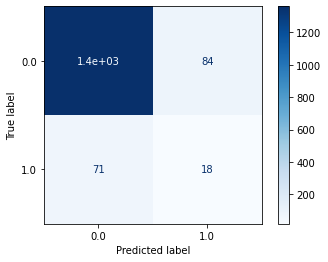

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

df_X = df.drop(['id','stroke'],axis=1)
df_y = df['stroke']
#imputation
df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)
#categorical encoding
cat_features = ['gender','ever_married','work_type','Residence_type', 'smoking_status']
le = LabelEncoder()
for i in cat_features:
  df_X[i] = le.fit_transform(df_X[i])

X = df_X.astype(float).values
y = df_y.astype(float).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
#scaling
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

dt=DecisionTreeClassifier(random_state=42)

grid_values = {'max_depth': [3, 15, 20, 40, 60],'criterion':['gini', 'entropy' ]}
grid_dt = GridSearchCV(dt, param_grid = grid_values,scoring = 'recall', cv=10)
grid_dt.fit(X_train, y_train)

#Predict values based on new parameters
y_pred = grid_dt.predict(X_test)

#best hyperparameters
print(grid_dt.best_params_)
print(grid_dt.best_estimator_)

print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='macro')) 

sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(grid_dt, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()


## randomized search

{'max_depth': 15, 'criterion': 'gini'}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
Accuracy :  0.9021526418786693
Precision :  0.5781655237965917
Recall/ sensitivity :  0.5895841762893336
Specificity :  0.5895841762893336
Confusion matrix :
[[1362   82]
 [  68   21]]
Plot Confusion Matrix :


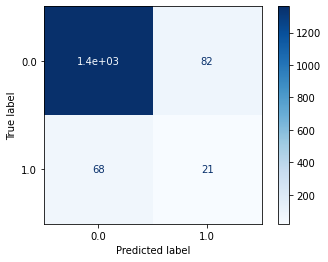

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import random

df_X = df.drop(['id','stroke'],axis=1)
df_y = df['stroke']
#imputation
df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)
#categorical encoding
cat_features = ['gender','ever_married','work_type','Residence_type', 'smoking_status']
le = LabelEncoder()
for i in cat_features:
  df_X[i] = le.fit_transform(df_X[i])

X = df_X.astype(float).values
y = df_y.astype(float).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
#scaling
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

dt=DecisionTreeClassifier(random_state=42)
rand_values = {'max_depth': [3, 15, 20, 40, 60],'criterion':['gini', 'entropy' ]}
rand_dt = RandomizedSearchCV(dt, param_distributions = rand_values,scoring = 'recall', cv=10, n_iter=3, random_state=42)
rand_dt.fit(X_train, y_train)

#Predict values based on new parameters
y_pred = rand_dt.predict(X_test)

#best hyperparameters
print(rand_dt.best_params_)
print(rand_dt.best_estimator_)

print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='macro')) 

sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(rand_dt, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## model selection

In [70]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

df_X = df.drop(['id','stroke'],axis=1)
df_y = df['stroke']
#imputation
df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)
#categorical encoding
cat_features = ['gender','ever_married','work_type','Residence_type', 'smoking_status']
le = LabelEncoder()
for i in cat_features:
  df_X[i] = le.fit_transform(df_X[i])

X = df_X.astype(float).values
y = df_y.astype(float).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Construct some pipelines
pipe_dt = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=42, max_depth=15, criterion='gini'))
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
pipe_rf = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=42))
pipe_bag = make_pipeline(StandardScaler(), BaggingClassifier(random_state=42))

pipes = [pipe_dt, pipe_knn, pipe_lr, pipe_rf, pipe_svc, pipe_bag]
names_pipes = ['DT','KNN','LR','RF','SVM','Bagging']

for i in range(len(pipes)):
  print(names_pipes[i])
  pipes[i].fit(X_train, y_train)
  y_pred = pipes[i].predict(X_test)
  print('Accuracy : ',accuracy_score(y_test, y_pred))    
  print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
  print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='macro')) 
  print('--------')
  print('')



DT
Accuracy :  0.9021526418786693
Precision :  0.5781655237965917
Recall/ sensitivity :  0.5895841762893336
--------

KNN
Accuracy :  0.9406392694063926
Precision :  0.5962230215827338
Recall/ sensitivity :  0.504579196364655
--------

LR
Accuracy :  0.9419439008480104
Precision :  0.4709719504240052
Recall/ sensitivity :  0.5
--------

RF
Accuracy :  0.9406392694063926
Precision :  0.47093403004572176
Recall/ sensitivity :  0.49930747922437674
--------

SVM
Accuracy :  0.9419439008480104
Precision :  0.4709719504240052
Recall/ sensitivity :  0.5
--------

Bagging
Accuracy :  0.9334637964774951
Precision :  0.5301295980133478
Recall/ sensitivity :  0.5060420492390053
--------



# Confusion matrix

In [71]:
y_true = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,0,0,0,0,1,1,1,1,1]

y_test = y_true
print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='macro')) 

sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))


Accuracy :  1.0
Precision :  1.0
Recall/ sensitivity :  1.0
Specificity :  1.0
Confusion matrix :
[[5 0]
 [0 5]]


In [72]:
y_true = [0,0,0,0,0,1,1,1,1,1]
y_pred = [1,1,0,0,0,0,1,1,1,1]

y_test = y_true
print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='macro')) 

sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))

Accuracy :  0.7
Precision :  0.7083333333333333
Recall/ sensitivity :  0.7
Specificity :  0.7
Confusion matrix :
[[3 2]
 [1 4]]
